In [26]:
from dotenv import load_dotenv
import os
from PIL import Image
import google.generativeai as genai
from google.generativeai.generative_models import Blob


ImportError: cannot import name 'Blob' from 'google.generativeai.generative_models' (c:\a\envs\bill\lib\site-packages\google\generativeai\generative_models.py)

In [4]:
load_dotenv()
genai.configure(api_key = os.getenv("GOOGLE_API_KEY'"))

In [5]:
model = genai.GenerativeModel("gemini-pro-vision")

In [6]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

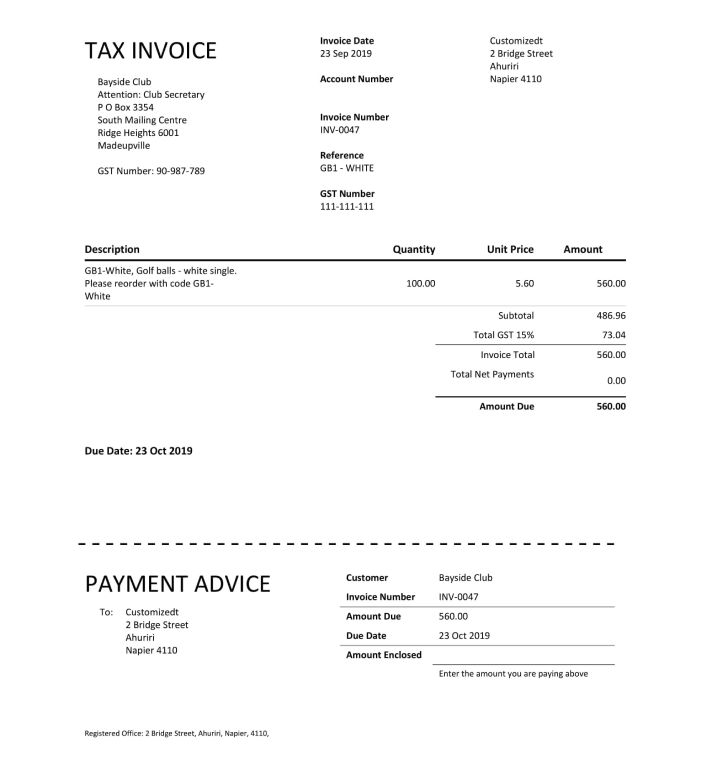

In [10]:
img = Image.open('invoice@2x.png')
img

In [11]:
response = model.generate_content(img)


In [14]:
print(response.text)

 INVOICE
Invoice Date: 23 Sep 2019
Invoice Number: INV-0047
GST Number: 90-987-789

Customer:
Bayside Club
Attention: Club Secretary
P O Box 3354
South Mailing Centre
Ridge Heights 6001
Madeupville

Customized
2 Bridge Street
Ahuriri
Napier 4110

Account Number: INV-0047
Reference: GB1 - WHITE

Description                      Quantity  Unit Price  Amount
GB1-White, Golf balls - white single.
Please reorder with code GB1.     100.00      5.60       560.00
                                                                  
                                                                Subtotal:     486.96
                                                                Total GST 15%:  73.04
                                                                Total Net Payments: 560.00

Amount Due: 560.00
Due Date: 23 Oct 2019

PAYMENT ADVICE
To: Customer
Bayside Club
2 Bridge Street
Ahuriri
Napier 4110

From: Customized
2 Bridge Street
Ahuriri
Napier 4110

Invoice Number: INV-0047
Invoice Due

In [16]:
model2 = genai.GenerativeModel("gemini-pro")

In [24]:
import io

image = Image.open('C:\Projects\Bill-Reader\invoice@2x.png')

# Convert the image to bytes
with io.BytesIO() as output:
    image.save(output, format="PNG")
    bytes_data = output.getvalue()
mime_type = f"image/{image.format.lower()}"

# Create the image_parts dictionary
image_parts = [{'mime_type': mime_type, 'data': bytes_data}]

input = "What is the address"


[{'mime_type': 'image/png', 'data': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xc8\x00\x00\x03\x04\x08\x06\x00\x00\x00\xa2\xf6\xd3\r\x00\x01\x00\x00IDATx\x9c\xec\xddwx\x14\xd5\xd7\xc0\xf1\xefl\xc9\xa6\xf7\x84\x12j\x80 H\xef\xbd\x08\x88H\x17DD\xaaJ\xaf\x8a\x05\x05\x94"E\xa4(\x88\x14)\xd2-HG\xa4J\r(=\xf4\x14JH\x08\t\xa4\xd7-3\xf3\xfe\xc1;\xf3\xdbP\xecJ\xd4\xfby\x9e<Iv\xa7\xdc\xdd\x9d\xdd=s\xe7\xdcs%UUU\x04A\x10\x04A\x10\x04A\x00\xc0\xf0\xb8\x1b \x08\x82 \x08\x82 \x08\x05\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A\x10\x04\xc1\x89\x08\x90\x05A\x10\x04A

In [32]:
response2 = model.generate_content([input,image_parts[0]])

In [35]:
print(response2.text)

 INVOICE NO: INV-0047
GBI Number: GB1 - WHITE
Invoice Date: 23 Sep 2019
Due Date: 23 Oct 2019

Customer:
Bayside Club
Attention: Club Secretary
P O Box 3354
South Mailing Centre
Ridge Heights 6001
Madeupville

GST Number: 90-987-789

Description      Quantity  Unit Price  Amount
GB1-White, Golf balls - white single.
Please reorder with code GB1.     100.00      5.60      560.00
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                                                
                               